In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [41]:
domain_mapping = {418:'ksta', 1677:'tagesspiegel', 35774:'sport1', 694:'gulli', }

In [42]:
results = pd.read_csv('cgfullall', delimiter=',', header=None, names=['ranker', 'day', 'domain','correct','total', 'precision', 'recall','cg','avggain'])
domains = results['domain']
domains = domains.unique()
domains = domains.tolist()
domains.remove(3336)
domains.remove(2522)
domains.remove(596)
domains.remove(13554)

rankers = results['ranker']
rankers = rankers.unique()

In [43]:
results = results.fillna(0)

In [44]:
domains

[694, 35774, 418, 1677]

In [45]:
results

,ranker,day,domain,correct,total,precision,recall,cg,avggain
0,coocrank,1,694,129,546,0.236264,0.260000,47.571131,0.368768
1,coocrank,1,35774,19383,60688,0.319388,0.318339,3030.048974,0.156325
2,coocrank,1,13554,0,0,0.000000,0.000000,0.000000,0.000000
3,coocrank,1,418,2362,8673,0.272339,0.308244,534.080773,0.226114
4,coocrank,1,596,0,0,0.000000,0.000000,0.000000,0.000000
5,coocrank,1,2522,0,0,0.000000,0.000000,0.000000,0.000000
6,coocrank,1,1677,11738,26287,0.446533,0.168142,1769.295116,0.150732
7,coocrank,1,3336,0,2,0.000000,0.000000,0.000000,0.000000
8,coocrank,2,694,144,601,0.239601,0.345455,38.555557,0.267747
9,coocrank,2,35774,7740,52025,0.148775,0.321799,1275.616715,0.164808


In [34]:
linestyles = [[8, 4, 2, 4, 2, 4],[2, 2, 2, 2, 2, 2], [4, 8, 4, 1, 1, 1], [10, 10], [5, 10, 20, 10]]

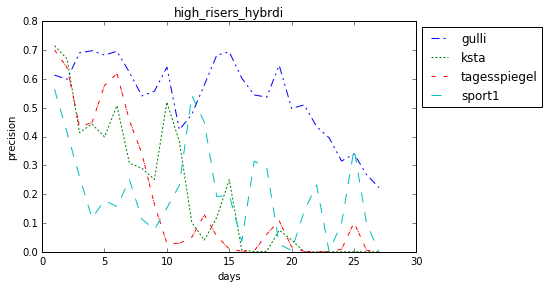

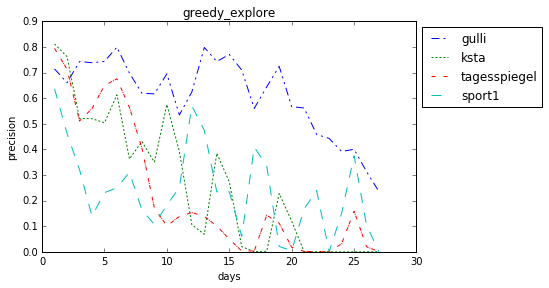

In [35]:
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    j = 0
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.65,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
        ax.plot(days, precision, dashes=linestyles[j])
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1.png' % ranker)
        j = j + 1


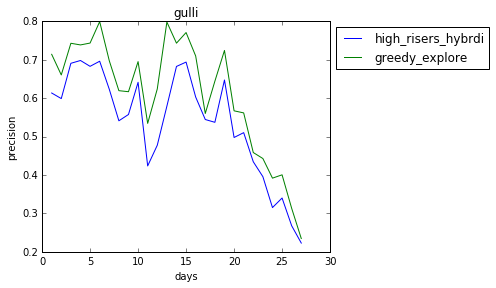

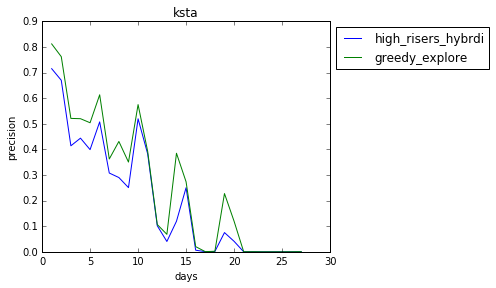

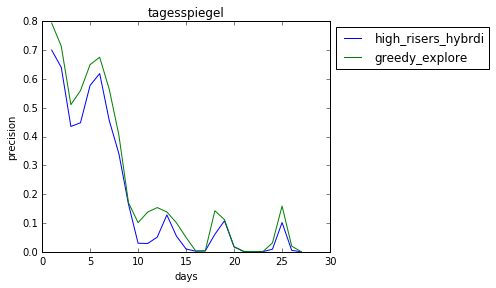

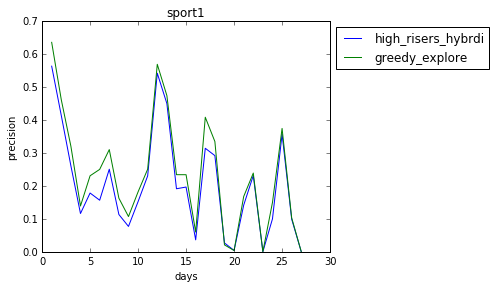

In [36]:
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    j = 0
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.5,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
#         ax.plot(days, precision, dashes=linestyles[j])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)
        j = j + 1

        

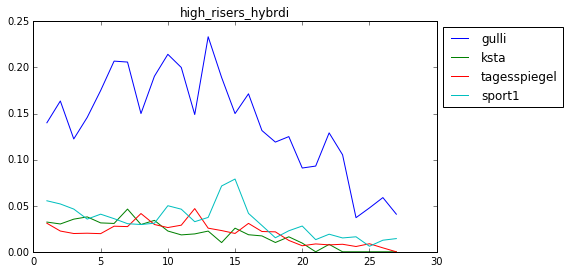

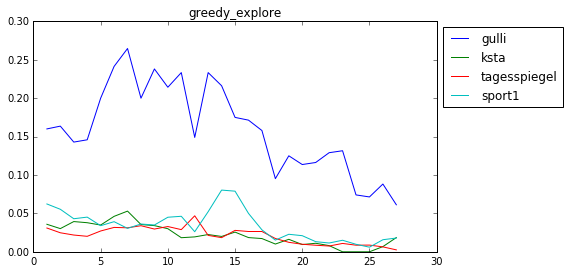

In [37]:
#recall per ranker
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, recall)
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1_recall.png' % ranker)

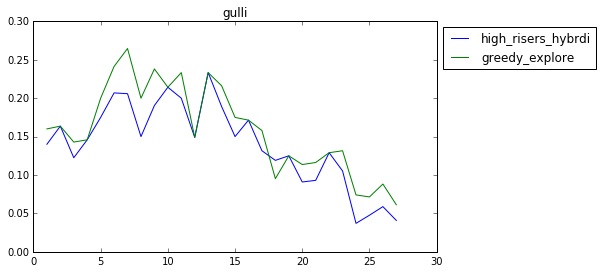

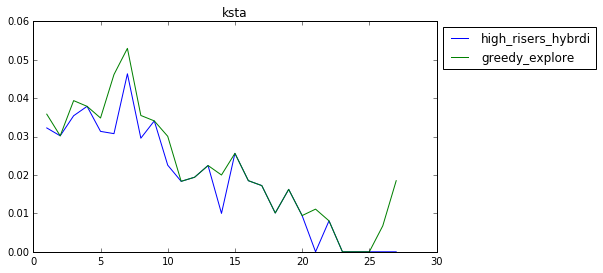

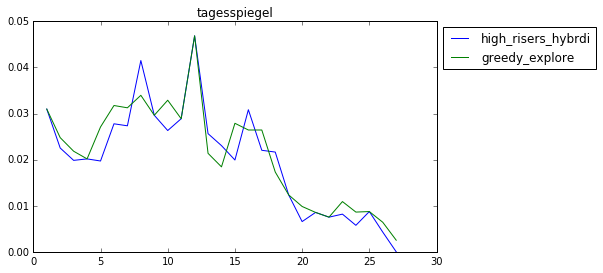

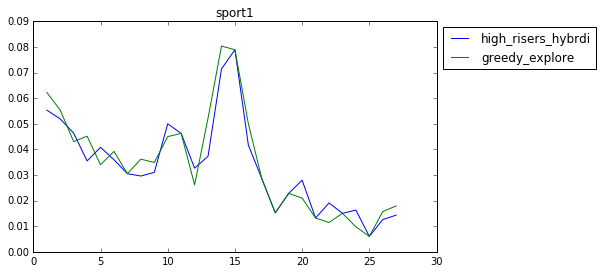

In [38]:
#recall per domain
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, recall)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1_recall.png' % domain)

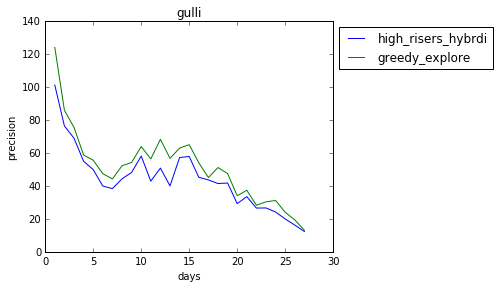

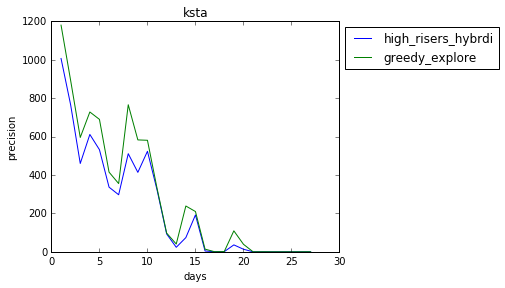

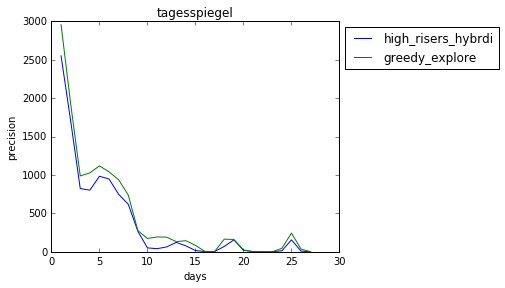

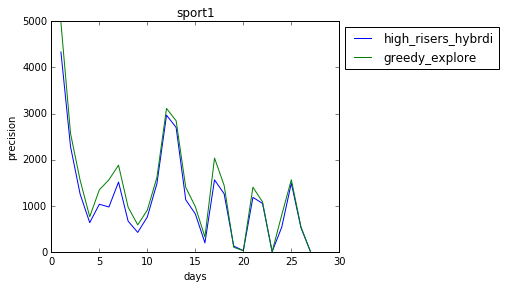

In [39]:
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    j = 0
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['cg']
        ax.set_position([0.1,0.1,0.5,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
#         ax.plot(days, precision, dashes=linestyles[j])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)
        j = j + 1
        if j == 8:
            break

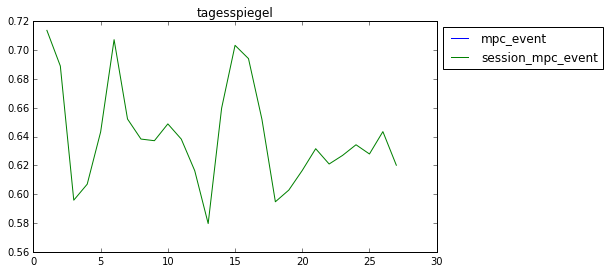

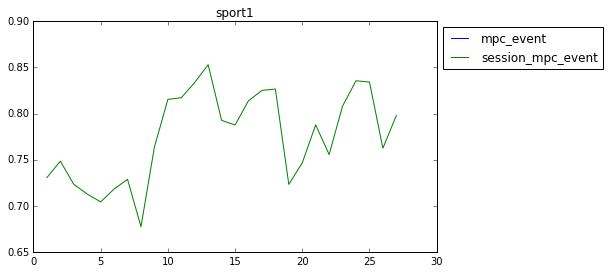

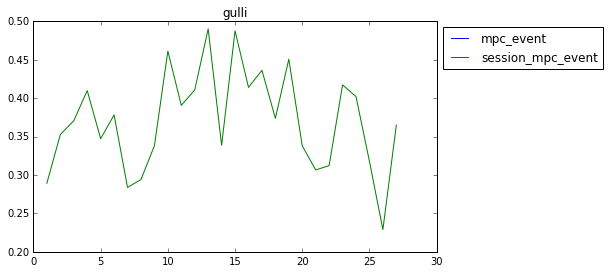

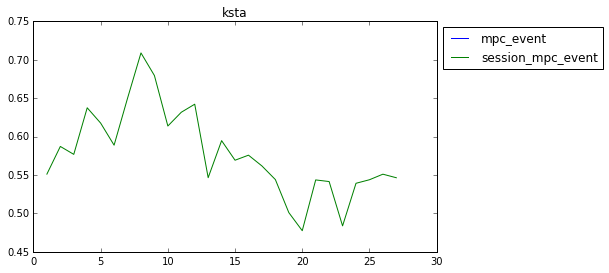

In [46]:
i=0
rankers = ['mpc_event', 'session_mpc_event']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_event_%s.png' % domain)

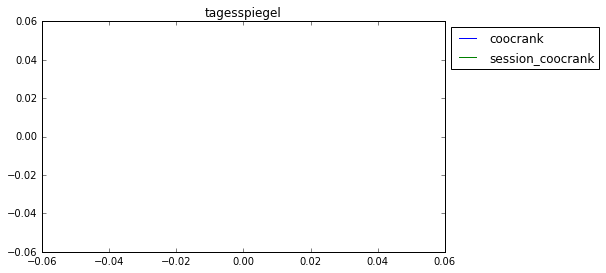

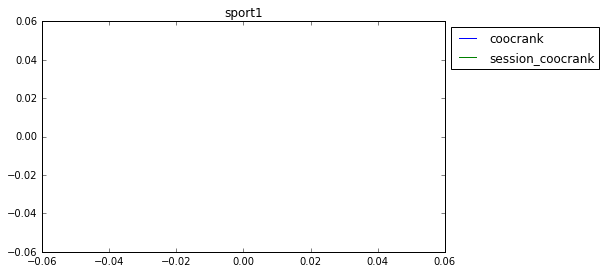

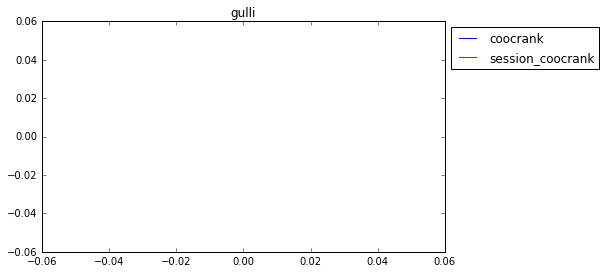

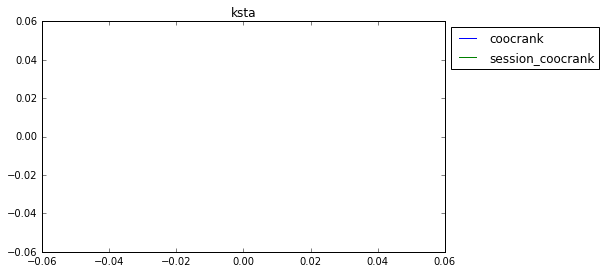

In [47]:
i=0
rankers = ['coocrank', 'session_coocrank']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_coocrank_%s.png' % domain)

In [73]:

import numpy as np
for domain in domains:
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['precision']
        print(domain_mapping[domain], ranker, np.mean(recall.values))
        

ksta poprank_event 0.807943378047
ksta poprank_event_1 0.811300878681
ksta poprank_event_2 0.793334372453
ksta poprank_event_4 0.763520925276
ksta poprank_event_8 0.734440620921
ksta poprank_event_16 0.678527622835
ksta poprank_event_24 0.646454550546
ksta poprank_event_32 0.617092574505
gulli poprank_event 0.733680408234
gulli poprank_event_1 0.662813979141
gulli poprank_event_2 0.708187196576
gulli poprank_event_4 0.720162937446
gulli poprank_event_8 0.72857262556
gulli poprank_event_16 0.723632407346
gulli poprank_event_24 0.691535237899
gulli poprank_event_32 0.692087254986
tagesspiegel poprank_event 0.76475516092
tagesspiegel poprank_event_1 0.761178025998
tagesspiegel poprank_event_2 0.736402396161
tagesspiegel poprank_event_4 0.709587238563
tagesspiegel poprank_event_8 0.671489476854
tagesspiegel poprank_event_16 0.627548107806
tagesspiegel poprank_event_24 0.583644332457
tagesspiegel poprank_event_32 0.5588499057
sport1 poprank_event 0.704132686895
sport1 poprank_event_1 0.7187

In [48]:
import numpy as np
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    recall = subresults['recall']
    print(ranker, np.mean(recall.values))

coocrank 0.28370971611
poprank_event 0.137356261819
poprank 0.104802223148
seqrank 0.302506873093
contentrank 0.0727081574875
session_coocrank 0.261617084471
session_seqrank 0.299430554293
session_mpc_event 0.326947655982
mpc_event_24 0.345725225484
mpcviews 0.238623409487
keyword_rec 0.191947061064
most_popular_topic 0.281137325057


In [47]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['precision']
    print(ranker, np.mean(precision.values))

coocrank 0.268520632361
poprank_event 0.75261161606
poprank 0.203219894095
seqrank 0.308660770868
contentrank 0.0165592990303
session_coocrank 0.267619512279
session_seqrank 0.326388664484
session_mpc_event 0.59115466013
mpc_event_24 0.576089552857
mpcviews 0.0719835360993
keyword_rec 0.0287447002006
most_popular_topic 0.500472506552


In [26]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['avggain']
    print(ranker, np.mean(precision.values))

coocrank 0.170970324215
poprank_event 0.137450395168
poprank 0.209263243634
seqrank 0.162666566244
contentrank 0.19265995283
session_coocrank 0.175543992035
session_seqrank 0.160732074596
session_mpc_event 0.144184304971
mpc_event_24 0.144795822313
mpcviews 0.301917056352
keyword_rec 0.258149244865
most_popular_topic 0.14006359972
